<a href="https://colab.research.google.com/github/phuonggtrann/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Replicate

df = pd.DataFrame({'a': [1,3,2,4,3,5], 'b': [3,5,4,6,5,7]})
df.head()

,a,b
0,1,3
1,3,5
2,2,4
3,4,6
4,3,5


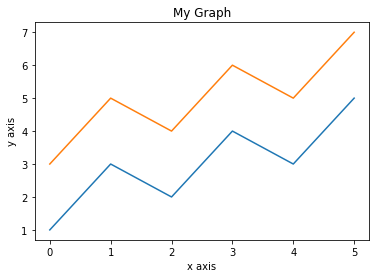

In [3]:
df['a'].plot();
plt.plot(df['b'])
plt.title('My Graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

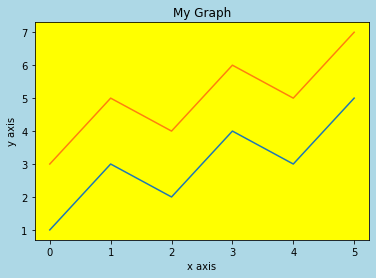

In [4]:
fig, ax = plt.subplots()

ax.plot(df['a'])
ax.plot(df['b'])

fig.patch.set_facecolor('lightblue')

ax.set_facecolor('yellow')

ax.set_title("My Graph")
ax.set_xlabel("x axis")
ax.set_ylabel('y axis')

plt.show()

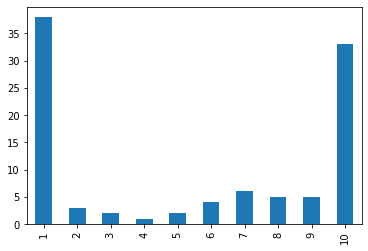

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar();

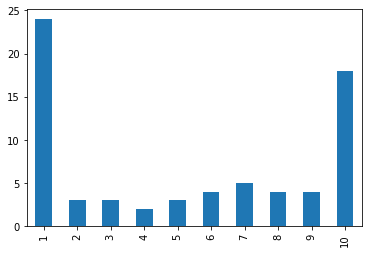

In [6]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar();

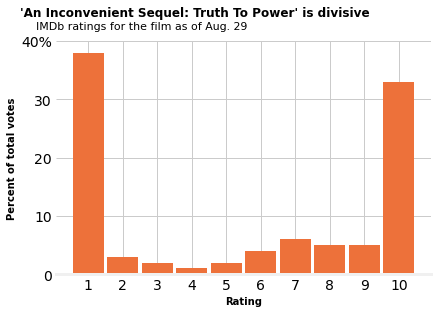

In [7]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# Turn on the Grid: Change the stylesheet that we're working with

# White figure background
fig.patch.set_facecolor('white')

# White axes background
ax.set_facecolor('white')

# put bars on the chart
ax.bar(x=range(1,11,1), height=fake, color='#ED713A', width=.9)

# Add Title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=12, fontweight='bold', x=.37, y=1.08)

# Add subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', y=42, x=-.5, fontsize=11)

# set x and y axis labels
ax.set_xlabel('Rating', fontsize=10, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight='bold')

# x axis tick marks and tick lables
ax.set_xticks(range(1,11,1))
ax.set_xticklabels(range(1,11,1))

# y axis tick marks and tick lables
ax.set_yticks(range(0,41,10))
ax.set_yticklabels(['0', '10', '20', '30', '40%'])

# Turn off some of the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [8]:
steak_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv")

steak_df = steak_df.drop(0)
steak_df

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,3.234959e+09,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,3.234762e+09,Lottery B,No,No,No,No,Yes,No,Yes,Medium rare,Female,18-29,"$25,000 - $49,999",High school degree,South Atlantic
547,3.234762e+09,Lottery A,No,Yes,No,Yes,Yes,No,No,NaN,Female,> 60,"$50,000 - $99,999",Some college or Associate degree,Mountain
548,3.234761e+09,Lottery A,Yes,Yes,Yes,No,Yes,No,Yes,Medium rare,Male,30-44,"$50,000 - $99,999",Some college or Associate degree,South Atlantic
549,3.234761e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,No,NaN,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,Pacific


In [9]:
steak_prepare = steak_df[['How do you like your steak prepared?']]
steak_prepare['How do you like your steak prepared?'].value_counts()

Medium rare    166
Medium         132
Medium Well     75
Well            36
Rare            23
Name: How do you like your steak prepared?, dtype: int64

In [0]:
total = steak_prepare['How do you like your steak prepared?'].count() # total choices count

In [0]:
# Convert it to a dict
choice = dict(steak_prepare['How do you like your steak prepared?'].value_counts())
choice_perc = []

In [46]:
for x in choice.keys(): # Doing calculation, better if use hash map but since data remain small for loop is fine
  choice[x] = (choice[x]/total)*100
  choice_perc.append(int(round(choice[x])))

choice_perc # Just checking

[38, 31, 17, 8, 5]

In [0]:
choice_list = list(choice.keys())

In [61]:
print(choice_list)

['Medium rare', 'Medium', 'Medium Well', 'Well', 'Rare']


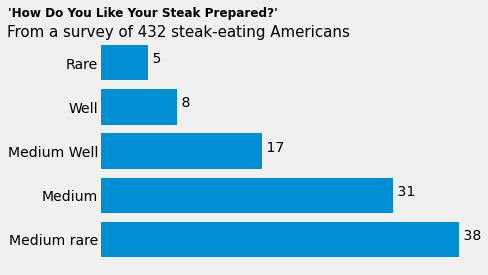

In [88]:
# Standard setting
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.set_title("'How Do You Like Your Steak Prepared?'", fontsize=12, fontweight='bold', x=0.11, y=1.05)
ax.text(s="From a survey of 432 steak-eating Americans", y=4.6, x=-10, fontsize=15)

ax.barh(choice_list, choice_perc)
ax.set_yticklabels(choice.keys())

# Turn off some of the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.grid(False) # remove grid

for index, value in enumerate(choice_perc):
    plt.text(value, index, " " + str(value))

plt.show() # always put this down



# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
#tg_df = pd.read_csv("https://github.com/fivethirtyeight/data/blob/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv", encoding = 'utf8')